In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
cd /content/gdrive/MyDrive/Smart City Hackathon

/content/gdrive/MyDrive/Smart City Hackathon


In [3]:
!pip uninstall keras -y
!pip uninstall tensorflow -y

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


In [4]:
!pip install keras==2.0.8
!pip install tensorflow==1.15
!pip install h5py==2.10.0

     |████████████████████████████████| 276 kB 7.9 MB/s 
     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 503 kB 46.7 MB/s 
     |████████████████████████████████| 3.8 MB 19.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=aabc53c98cd7f8200f30c3482118cc0569402363670520b30c025d6801063093
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installat

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
import random
import math
import re
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.visualize import display_instances
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from mrcnn import model as modellib, utils

#import custom

# Root directory of the project
ROOT_DIR = "./"

DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [7]:
#  Configuration that will be used by Mask R-CNN library

class MaskRCNNConfig(Config):
    NAME = "coco_pretrained_model_config"
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1
    NUM_CLASSES = 1 + 80  # COCO dataset has 80 classes + one background class
    DETECTION_MIN_CONFIDENCE = 0.6
    
    
# Filter the result of Mask R-CNN to only obtain bounding boxes and class names of objects identified as cars

def getCarBoxes(boxes,class_ids):
    car_boxes = []
    
   
    for i,box in enumerate(boxes):
        #since the top view of the car is detect as cell phone, we included its index
        if class_ids[i] in [3,8,68]:
            car_boxes.append(boxes)
            
    return np.array(car_boxes)

In [8]:
# Root directory of the project
ROOT_DIR = "."

# Local path for logs and trained model.One of the best practices and useful while training the model . 
# Will not be used in this demonstration
MODEL_DIR = os.path.join(ROOT_DIR,"logs")


# Path for saving trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR,"mask_rcnn_coco.h5")


# Downloading weights of pre-trained model for COCO dataset from the release 
# Executed for the first time when to store the model weights in this repo

# if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)

In [29]:
IMAGE_DIR = "/content/gdrive/MyDrive/Smart City Hackathon/images"

# Create a Mask R-CNN model in inference mode
model = modellib.MaskRCNN(mode='inference', config=MaskRCNNConfig(),model_dir=MODEL_DIR)


# Load pre-trained model, this will load weights of model trained on COCO dataset
%time model.load_weights(COCO_MODEL_PATH,by_name=True)

CPU times: user 5.47 s, sys: 509 ms, total: 5.98 s
Wall time: 6.04 s


In [12]:
#list of all classes in coco dataset
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [42]:
parked_car_boxes = None

file_names = next(os.walk(IMAGE_DIR))[2]
image1 = skimage.io.imread(os.path.join(IMAGE_DIR,file_names[0]))
image2 = skimage.io.imread(os.path.join(IMAGE_DIR,file_names[1]))

In [43]:
%time result1 = model.detect([image1])

%time result2 = model.detect([image2])

r1 = result1[0]
r2 = result2[0]

CPU times: user 26.7 s, sys: 285 ms, total: 27 s
Wall time: 14 s
CPU times: user 26.7 s, sys: 273 ms, total: 26.9 s
Wall time: 13.9 s


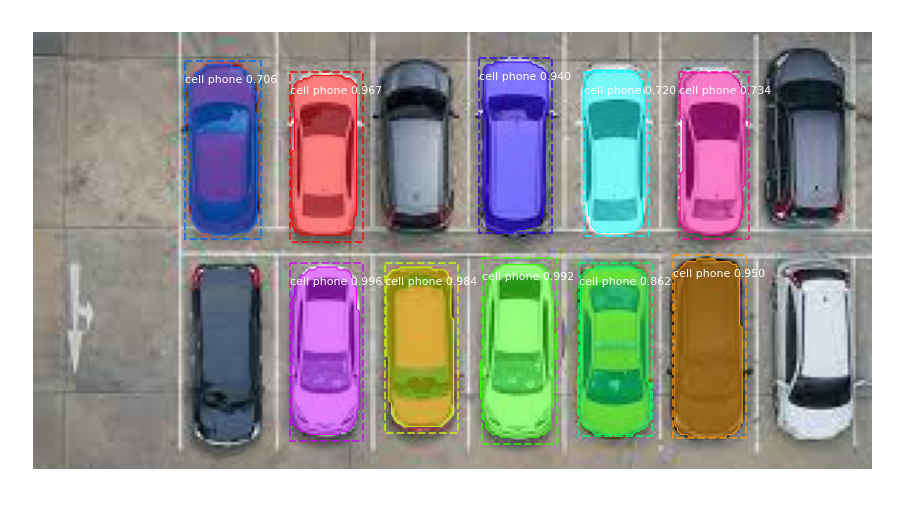

In [44]:
#Parking slot reference
visualize.display_instances(image1,r1['rois'],r1['masks'], r1['class_ids'], class_names, r1['scores'])

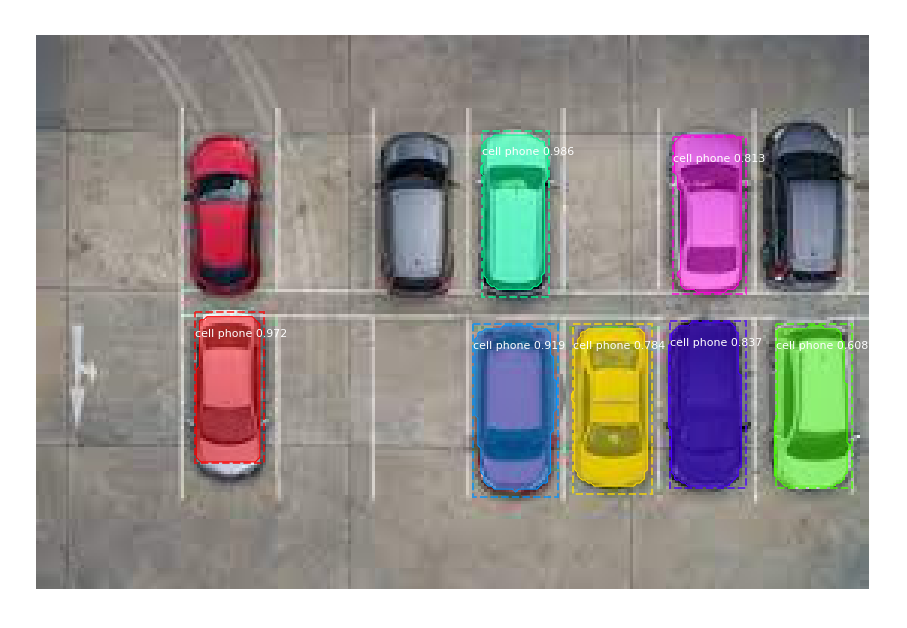

In [45]:
#test image
visualize.display_instances(image2,r2['rois'], r2['masks'], r2['class_ids'], class_names, r2['scores'])

In [46]:
# Filter the results to only get identified cars' bounding boxes

car_boxes1 = getCarBoxes(r1['rois'],r1['class_ids'])
car_boxes2 = getCarBoxes(r2['rois'],r2['class_ids'])

In [47]:
parking_spaces = car_boxes1[0]

# computinig center locations of each spot
center_locs = []

for spot_coords in parking_spaces:
    center_locs.append([int((spot_coords[1]+spot_coords[3])/2), int((spot_coords[0]+spot_coords[2])/2)])


centers = np.array(center_locs)

In [48]:
for i,box in enumerate(parking_spaces):
    y1, x1, y2, x2 = box
    cv2.rectangle(image1, (x1, y1), (x2, y2),(0,0,255),2)
    cv2.circle(image1,(centers[i][0],centers[i][1]),2,(0,0,255),2)

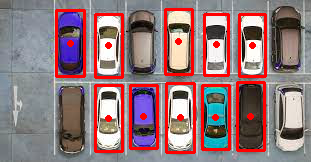

In [49]:
from google.colab.patches import cv2_imshow
cv2_imshow(image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
overlaps = utils.compute_overlaps(car_boxes2[0],parking_spaces)

overlap_prob = overlaps.sum(axis=0)

for i,box in enumerate(parking_spaces):
    y1, x1, y2, x2 = box
    
    if overlap_prob[i] >= 0.2:
        occupancy_status = (0,0,255)
    
    else:
        occupancy_status = (0,255,0)
    cv2.rectangle(image2,(x1,y1), (x2,y2) , occupancy_status ,1)
    cv2.circle(image2,(centers[i][0],centers[i][1]),2,occupancy_status,2)

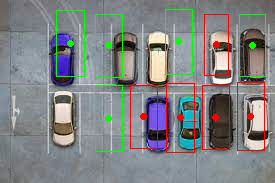

In [51]:
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()